# ROC curve 그리기
* __ROC(Receiver Operating Characteristic) curve__ : 민감도와 특이도가 어떤 관계를 가지고 변하는 지 그래프로 표시한 것입니다
* 이러한 ROC curve 아래 면적을 구한 값을 __AUC(Area Under Curve)__이라고 하는데, 하나의 수치로 계산되어서 성능 비교를 간단히 할 수 있습니다.
* 각 임계값별로 민감도와 특이도를 계산하여 x 축을 (1-특이도), y 축을 민담도로 뒤서 2차원 평면 상에 점을 찍고 연결 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
sens_F = np.array([1.0,  1.0, 1.0,  1.0, 0.75,  0.5,  0.5, 0.5, 0.5, 0.5, 0.0])
spec_F = np.array([0.0, 0.16, 0.5, 0.66, 0.66, 0.66, 0.83, 1.0, 1.0, 1.0, 1.0])

sens_G = np.array([1.0,  1.0, 0.75, 0.75, 0.5,  0.5,  0.5,  0.5, 0.25, 0.25, 0.0])
spec_G = np.array([0.0, 0.33, 0.33,  0.5, 0.5, 0.66, 0.66, 0.83, 0.83,  1.0, 1.0])

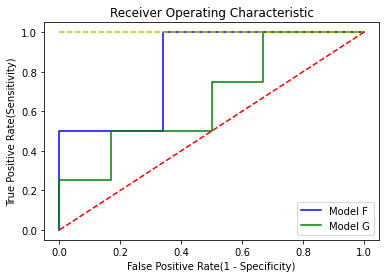

In [3]:
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(1-spec_F, sens_F, 'b', label = 'Model F')   
plt.plot(1-spec_G, sens_G, 'g', label = 'Model G') 
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

* 여기서 노란점선이 이상적인 모델을 표시한 것입니다. 
* 임계값과 상관없이 민감도와 특이도가 100%일때를 말하고, AUC 값은 1입니다. 
* 빨간점선은 기준선으로서 AUC 값이 0.5입니다. 
* 개발한 모델을 사용하려면, 적어도 이 기준선보다는 상위에 있어야 되겠죠? 모델 F와 모델 G를 비교해보면, 모델 F가 모델 G보다 상위에 있음을 알 수 있습니다. 
* AUC를 보더라도 모델 F가 면적이 더 넓습니다. 

## sklearn 패키지 이용하기  
* sklearn 패키지는 ROC curve 및 AUC를 좀 더 쉽게 구할 수 있는 함수를 제공합니다. 
* 임계값 변화에 따른 민감도, 특이도를 계산해서 입력할 필요없이, 클래스 값과 모델에서 나오는 클래스 확률 값을 그대로 입력하면, ROC curve를 그릴 수 있는 값과 AUC 값을 알려줍니다.

In [4]:
from sklearn.metrics import roc_curve, auc

In [5]:
class_F = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])
proba_F = np.array([0.05, 0.15, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.95, 0.95])

class_G = np.array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1])
proba_G = np.array([0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.65, 0.75, 0.85, 0.95])

In [6]:
false_positive_rate_F, true_positive_rate_F, thresholds_F = roc_curve(class_F, proba_F)
false_positive_rate_G, true_positive_rate_G, thresholds_G = roc_curve(class_G, proba_G)
roc_auc_F = auc(false_positive_rate_F, true_positive_rate_F)
roc_auc_G = auc(false_positive_rate_G, true_positive_rate_G)

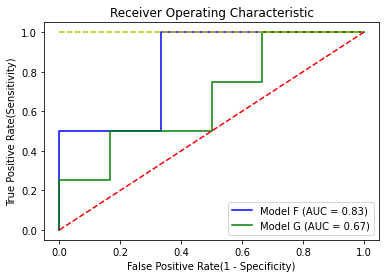

In [7]:
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')


plt.plot(false_positive_rate_F, true_positive_rate_F, 'b', label='Model F (AUC = %0.2f)'% roc_auc_F)
plt.plot(false_positive_rate_G, true_positive_rate_G, 'g', label='Model G (AUC = %0.2f)'% roc_auc_G)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()